
CIFAR-10 Classification Using CNN  
    

Overview:  
This project implements a Convolutional Neural Network (CNN) to classify images in the CIFAR-10 dataset into 10 categories.  
The model is trained using TensorFlow and Keras, and achieves a test accuracy of approximately 69.60%.  

References:  
1. TensorFlow Official Documentation - Keras and CIFAR-10  
   https://www.tensorflow.org/tutorials/images/cnn  
2. Keras CIFAR-10 Example  
   https://keras.io/examples/vision/image_classification_from_scratch/  
3. Keras Documentation  
   https://keras.io/  
4. CIFAR-10 Dataset  
   https://www.cs.toronto.edu/~kriz/cifar.html  
5. TensorFlow and Keras CNN Tutorials  
   https://www.tensorflow.org/tutorials/images/cnn


# **Load the CIFAR-10 Dataset using TensorFlow/Keras**


In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Print dataset shape
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


#**Normalize the Data**
**converting the values from 0-255 to a range of 0-1**

In [8]:
# Normalize pixel values to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

print("Data normalized successfully!")


Data normalized successfully!


# **Define the Model**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Convolutional layer
    MaxPooling2D((2, 2)),  # Max pooling layer
    Conv2D(64, (3, 3), activation='relu'),  # Another convolutional layer
    MaxPooling2D((2, 2)),  # Another max pooling layer
    Flatten(),  # Flatten layer
    Dense(64, activation='relu'),  # Fully connected layer
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

# **Compile the Model**
**Loss function → Measures the model's error**

**Optimizer → Helps improve model accuracy**

**Metrics → track "accuracy" to measure model performance**

In [10]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

print("Model compiled successfully!")


Model compiled successfully!


# **Train the Model**


In [11]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.3755 - loss: 1.7194 - val_accuracy: 0.5710 - val_loss: 1.2035
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5949 - loss: 1.1473 - val_accuracy: 0.6428 - val_loss: 1.0226
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6580 - loss: 0.9833 - val_accuracy: 0.6584 - val_loss: 0.9891
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6940 - loss: 0.8782 - val_accuracy: 0.6777 - val_loss: 0.9522
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7123 - loss: 0.8204 - val_accuracy: 0.6772 - val_loss: 0.9445
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.7368 - loss: 0.7528 - val_accuracy: 0.7032 - val_loss: 0.8734
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7587 - loss: 0.6956 - val_accuracy: 0.6911 - val_loss: 0.9172
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7667 - loss: 0.65

#**Evaluate the Model**

In [12]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


313/313 - 1s - 2ms/step - accuracy: 0.6960 - loss: 0.9460

Test Accuracy: 69.60%


# **Make Predictions on New Images**

In [13]:
import numpy as np

# Select a random image from the test set
random_index = np.random.randint(0, len(x_test))
sample_image = x_test[random_index]
true_label = y_test[random_index][0]  # True class label

# Reshape the image for prediction
sample_image_expanded = np.expand_dims(sample_image, axis=0)

# Get the predicted class
predicted_class = np.argmax(model.predict(sample_image_expanded))

# Class names in CIFAR-10 dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Print results
print(f"True Label: {class_names[true_label]}")
print(f"Predicted Label: {class_names[predicted_class]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
True Label: Automobile
Predicted Label: Automobile


# **Save the Model**

In [14]:
# Save the trained model
model.save("cifar10_model.h5")

print("Model saved successfully!")


Model saved successfully!


# **Download Model File**

In [15]:
from google.colab import files
files.download("cifar10_model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Test accuracy**

In [16]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Print test accuracy
print(f"\nTest Accuracy: {test_acc * 100:.2f}%")


313/313 - 1s - 2ms/step - accuracy: 0.6960 - loss: 0.9460

Test Accuracy: 69.60%


In [20]:
from tensorflow.keras.models import load_model

# Load the uploaded model
model = load_model("cifar10_model.h5")
print("Model loaded successfully!")


Model loaded successfully!


# **Individual image prediction**

In [40]:
from google.colab import files

# This will open a file upload prompt
uploaded = files.upload()


Saving catboss.jpg to catboss.jpg


In [41]:
import numpy as np
import cv2  # OpenCV for image processing
from tensorflow.keras.preprocessing import image

# Load the image
img_path = "catboss.jpg"  # Change this to your image file
img = cv2.imread(img_path)  # Read image using OpenCV

# Resize the image to 32x32 pixels (CIFAR-10 format)
img = cv2.resize(img, (32, 32))

# Convert image to an array
img_array = image.img_to_array(img)

# Normalize pixel values (CIFAR-10 images are scaled between 0-1)
img_array = img_array / 255.0  # Scale values between 0 and 1

# Reshape to match the model input shape (Batch size of 1)
img_array = np.expand_dims(img_array, axis=0)  # Shape becomes (1, 32, 32, 3)

print("Image preprocessed successfully!")


Image preprocessed successfully!


In [44]:
# Import the necessary libraries
from tensorflow.keras.models import load_model
import numpy as np

# Load the trained model
model = load_model("cifar10_model.h5")

# Make the prediction using the preprocessed image
prediction = model.predict(img_array)

# The prediction will give you probabilities for each class, so use argmax to get the predicted class
predicted_class = np.argmax(prediction)

# Print the predicted class
print(f"Predicted class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
Predicted class: 3


In [45]:
# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Print the predicted class name
print(f"Predicted class: {class_names[predicted_class]}")


Predicted class: cat


In [46]:
from google.colab import files

# This will open a file upload prompt
uploaded = files.upload()


Saving dogboss.jpg to dogboss.jpg


In [47]:
import numpy as np
import cv2  # OpenCV for image processing
from tensorflow.keras.preprocessing import image

# Load the image
img_path = "dogboss.jpg"  # Change this to your image file
img = cv2.imread(img_path)  # Read image using OpenCV

# Resize the image to 32x32 pixels (CIFAR-10 format)
img = cv2.resize(img, (32, 32))

# Convert image to an array
img_array = image.img_to_array(img)

# Normalize pixel values (CIFAR-10 images are scaled between 0-1)
img_array = img_array / 255.0  # Scale values between 0 and 1

# Reshape to match the model input shape (Batch size of 1)
img_array = np.expand_dims(img_array, axis=0)  # Shape becomes (1, 32, 32, 3)

print("Image preprocessed successfully!")


Image preprocessed successfully!


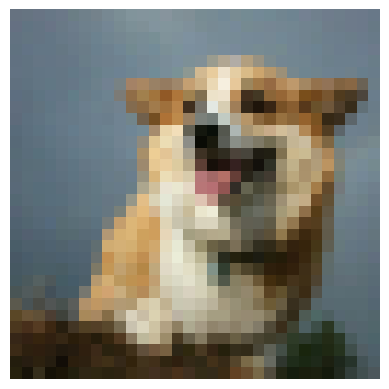

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load your trained model (Make sure you have it saved)
model = load_model("cifar10_model.h5")

# Specify the image filename you uploaded
image_filename = list(uploaded.keys())[0]  # Automatically selects uploaded image

# Load the image
img = cv2.imread(image_filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV default) to RGB
img = cv2.resize(img, (32, 32))  # Resize to CIFAR-10 size (32x32)
img = img / 255.0  # Normalize the image (same as CIFAR-10 training data)
img = np.expand_dims(img, axis=0)  # Add batch dimension (model expects shape (1, 32, 32, 3))

# Display the image
plt.imshow(img[0])
plt.axis("off")
plt.show()


In [49]:
# Make a prediction
prediction = model.predict(img)
predicted_class = np.argmax(prediction)  # Get the class index

# CIFAR-10 class labels
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# Print the prediction
print("Predicted class:", class_names[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
Predicted class: dog


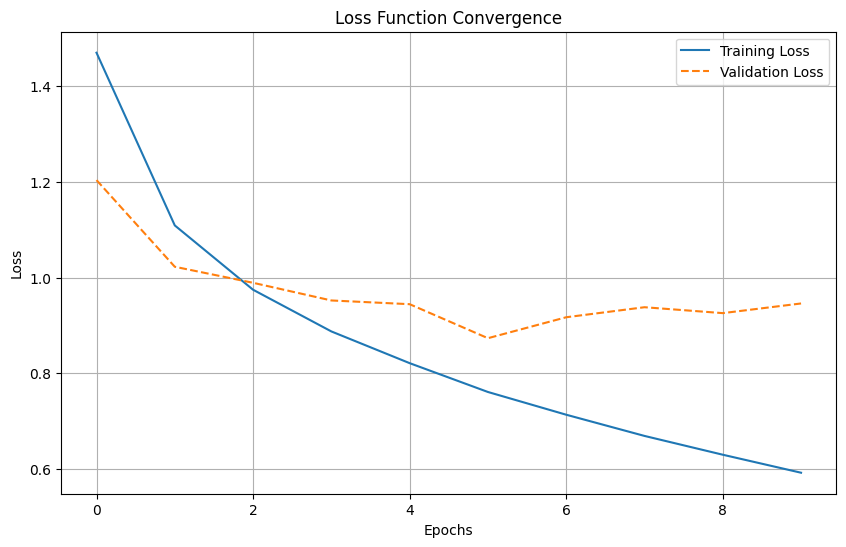

In [50]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result from model.fit() when training your model
# Example: history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Plotting the training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')

plt.title('Loss Function Convergence')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


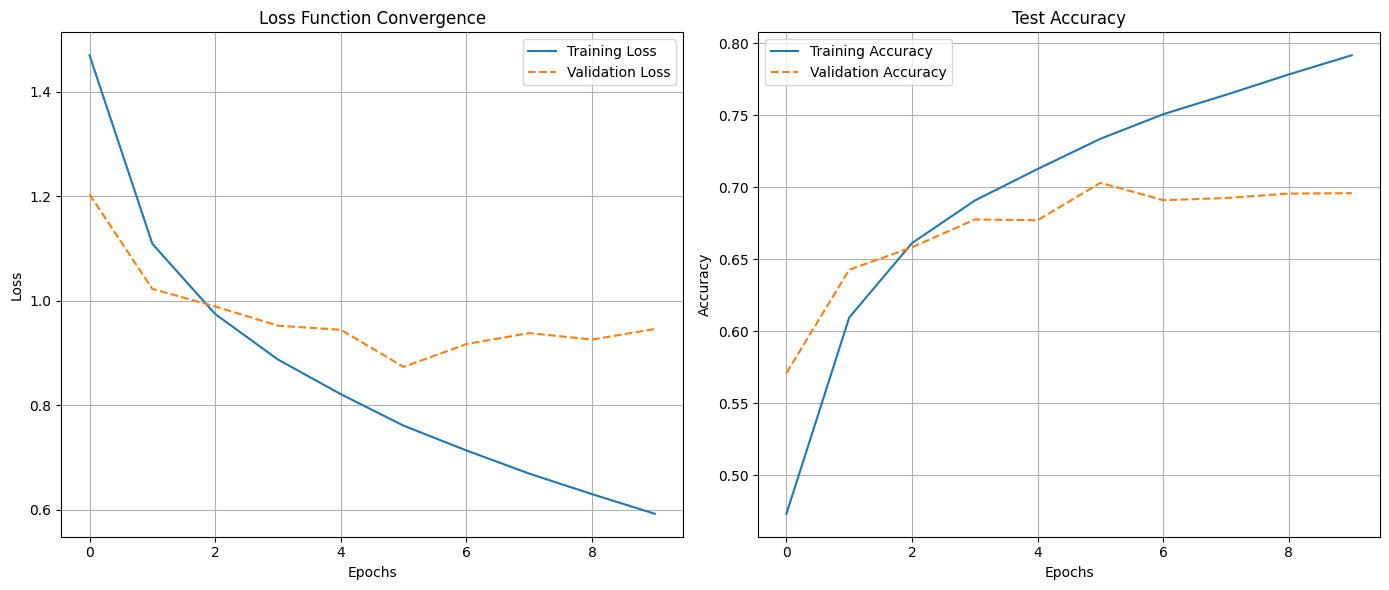

In [51]:
import matplotlib.pyplot as plt

# Assuming 'history' is the result from model.fit() when training your model
# Example: history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Create a figure to hold both plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plotting the training and validation loss
ax1.plot(history.history['loss'], label='Training Loss')
ax1.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
ax1.set_title('Loss Function Convergence')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

# Plotting the training and validation accuracy
ax2.plot(history.history['accuracy'], label='Training Accuracy')
ax2.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--')
ax2.set_title('Test Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

# Display the plots
plt.tight_layout()
plt.show()
